## Simulating the PHYS 232 Dice Game
### January 25, 2025

The rules of the game:
 - Pay $\$1.75$ to roll a pair of dice, $D_1$ and $D_2$.
 - If $\left\vert D_1- D_2\right\vert \ge 3$, you enar $M_1 = \$ 1$.
 - If $1 \le \left\vert D_1- D_2\right\vert \le 2$, you enar $M_2 = \$ 2$.
 - If $D_1 - D_2 = 0$, you earn $M_3 = \$ 3$.

Start by importing some packages.

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

We can simulate a roll of a die using ```random.choice()```.

In [3]:
D1 = random.choice([1, 2, 3, 4, 5, 6])
D2 = random.choice([1, 2, 3, 4, 5, 6])
diff = abs(D1- D2)
D1, D2, diff

(5, 5, 0)

The amount paid out can be determine using an ```if``` statement.

In [4]:
if diff == 0:
    M = 3
elif diff == 1 or diff == 2:
    M = 2
else:
    M = 1
cost = 1.75
profit = M - cost
M, profit

(3, 1.25)

All of this can be put inside a loop to simulate $N$ plays.

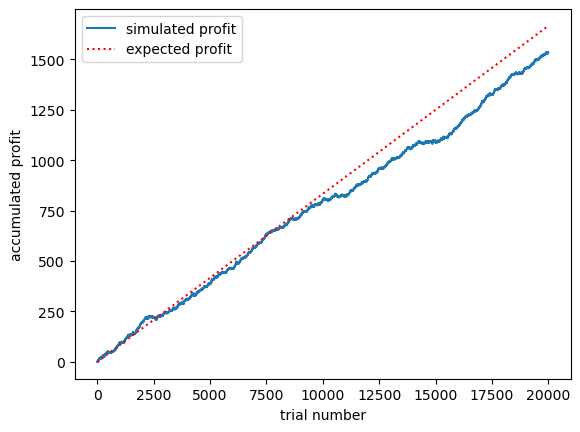

In [24]:
N = int(2e4) # Number of trials
tot = 0 # track to the total earnings
M_list = []
total = []
trial = []
for i in range(N):
    # Roll the dice
    D1 = random.choice([1, 2, 3, 4, 5, 6])
    D2 = random.choice([1, 2, 3, 4, 5, 6])

    # Calculate the difference
    diff = abs(D1- D2)

    # Determine the payout
    if diff == 0:
        M = 3
    elif diff == 1 or diff == 2:
        M = 2
    else:
        M = 1
    M_list = M_list + [M] #Build the list of payouts

    # Calculate the profit
    profit = M - 1.75

    # Track the total earnings
    tot = tot + profit
    trial = trial + [i]
    total = total + [tot] # Build the list of earnings
plt.plot(trial, total)
plt.plot(trial, np.array(trial)*(11/6 - 1.75), 'r:') # Plot expected profit
plt.xlabel("trial number")
plt.ylabel("accumulated profit")
plt.legend(['simulated profit', 'expected profit']);

We can calculate the average and standard deviation of $M$.

In [25]:
mu = np.average(M_list)
sigma = np.std(M_list)
print('The simulated mean was $' + '{0:.4f}'.format(mu) + ' which is close to the expected value of 11/6 = $1.8333.')
print('The simulated average profit was $' + '{0:.4f}'.format(mu - 1.75) + ' which is close to the expected value of 11/6 = $0.0833.')
print('The simulated mean was $' + '{0:.4f}'.format(sigma) + ' which is close to the expected value of $0.6872.')

The simulated mean was $1.8269 which is close to the expected value of 11/6 = $1.8333.
The simulated average profit was $0.0769 which is close to the expected value of 11/6 = $0.0833.
The simulated mean was $0.6854 which is close to the expected value of $0.6872.


Notice that the standard deviation is much larger than the average profit.  We should expect, therefore, that, in some cases, players will initially lose money.  Over the long term, however, everyone should be profitable.  Below, we simulate $20$ different players playing $N = 200$ games.  Some should, initially, lose money before crossing over to a postive profit. 

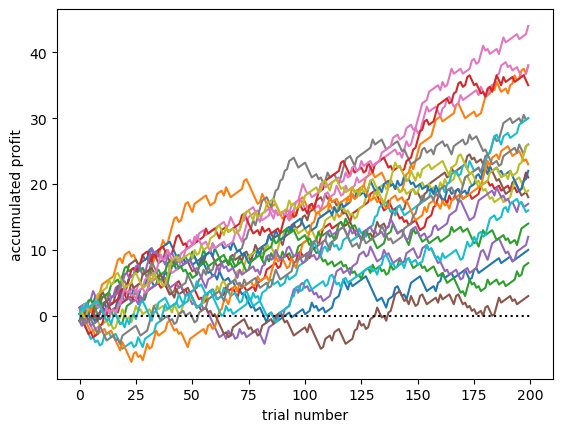

In [28]:
for j in range(20):
    N = int(2e2)
    tot = 0
    M_list = []
    total = []
    trial = []
    for i in range(N):
        D1 = random.choice([1, 2, 3, 4, 5, 6])
        D2 = random.choice([1, 2, 3, 4, 5, 6])
        diff = abs(D1- D2)
        if diff == 0:
            M = 3
        elif diff == 1 or diff == 2:
            M = 2
        else:
            M = 1
        M_list = M_list + [M]
        profit = M - 1.75
        tot = tot + profit
        trial = trial + [i]
        total = total + [tot]
    plt.plot(trial, total)
plt.plot([0,N],[0,0], 'k:')
plt.xlabel("trial number")
plt.ylabel("accumulated profit");